# Recommender System for Diversity Personalization

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### Data analysis

In [2]:
# Load book data from csv
books = pd.read_csv('../data/books.csv')
books

id  book_id  best_book_id   work_id  books_count        isbn  \
0         1  2767052       2767052   2792775          272   439023483   
1         2        3             3   4640799          491   439554934   
2         3    41865         41865   3212258          226   316015849   
3         4     2657          2657   3275794          487    61120081   
4         5     4671          4671    245494         1356   743273567   
...     ...      ...           ...       ...          ...         ...   
9995   9996  7130616       7130616   7392860           19   441019455   
9996   9997   208324        208324   1084709           19  067973371X   
9997   9998    77431         77431   2393986           60  039330762X   
9998   9999  8565083       8565083  13433613            7    61711527   
9999  10000     8914          8914     11817           31   375700455   

            isbn13                      authors  original_publication_year  \
0     9.780439e+12              Suzanne Collins                     2008.0   
1     9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2     9.780316e+12              Stephenie Meyer                     2005.0   
3     9.780061e+12                   Harper Lee                     1960.0   
4     9.780743e+12          F. Scott Fitzgerald                     1925.0   
...            ...                          ...                        ...   
9995  9.780441e+12                Ilona Andrews                     2010.0   
9996  9.780680e+12               Robert A. Caro                     1990.0   
9997  9.780393e+12              Patrick O'Brian                     1977.0   
9998  9.780062e+12              Peggy Orenstein                     2011.0   
9999  9.780376e+12                  John Keegan                     1998.0   

                                         original_title  ... ratings_count  \
0                                      The Hunger Games  ...       4780653   
1              Harry Potter and the Philosopher's Stone  ...       4602479   
2                                              Twilight  ...       3866839   
3                                 To Kill a Mockingbird  ...       3198671   
4                                      The Great Gatsby  ...       2683664   
...                                                 ...  ...           ...   
9995                                         Bayou Moon  ...         17204   
9996                                   Means of Ascent   ...         12582   
9997                              The Mauritius Command  ...          9421   
9998  Cinderella Ate My Daughter: Dispatches from th...  ...         11279   
9999                                The First World War  ...          9162   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0               4942365                   155254      66715     127936   
1               4800065                    75867      75504     101676   
2               3916824                    95009     456191     436802   
3               3340896                    72586      60427     117415   
4               2773745                    51992      86236     197621   
...                 ...                      ...        ...        ...   
9995              18856                     1180        105        575   
9996              12952                      395        303        551   
9997              10733                      374         11        111   
9998              11994                     1988        275       1002   
9999               9700                      364        117        345   

      ratings_3  ratings_4  ratings_5  \
0        560092    1481305    2706317   
1        455024    1156318    3011543   
2        793319     875073    1355439   
3        446835    1001952    1714267   
4        606158     936012     947718   
...         ...        ...        ...   
9995       3538       7860       6778   
9996       1737       3389       6972   


In [3]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [4]:
books = books.drop(columns=['isbn', 'isbn13', 'image_url', 'small_image_url'])
books

In [5]:
# Load ratings data from csv
ratings = pd.read_csv('../data/ratings.csv')
ratings

book_id  user_id  rating
0             1      314       5
1             1      439       3
2             1      588       5
3             1     1169       4
4             1     1185       4
...         ...      ...     ...
981751    10000    48386       5
981752    10000    49007       4
981753    10000    49383       5
981754    10000    50124       5
981755    10000    51328       1

[981756 rows x 3 columns]

In [6]:
# Load book_tags data from csv
book_tags = pd.read_csv('../data/book_tags.csv')
book_tags

goodreads_book_id  tag_id   count
0                       1   30574  167697
1                       1   11305   37174
2                       1   11557   34173
3                       1    8717   12986
4                       1   33114   12716
...                   ...     ...     ...
999907           33288638   21303       7
999908           33288638   17271       7
999909           33288638    1126       7
999910           33288638   11478       7
999911           33288638   27939       7

[999912 rows x 3 columns]

In [7]:
# Load tag data from csv
tags = pd.read_csv('../data/tags.csv')
tags

tag_id    tag_name
0           0           -
1           1        --1-
2           2       --10-
3           3       --12-
4           4      --122-
...       ...         ...
34247   34247   Ｃhildrens
34248   34248   Ｆａｖｏｒｉｔｅｓ
34249   34249       Ｍａｎｇａ
34250   34250      ＳＥＲＩＥＳ
34251   34251  ｆａｖｏｕｒｉｔｅｓ

[34252 rows x 2 columns]

In [8]:
# Merge book_tags and tags 
tags_join = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join

goodreads_book_id  tag_id   count     tag_name
0                       1   30574  167697      to-read
1                       2   30574   24549      to-read
2                       3   30574  496107      to-read
3                       5   30574   11909      to-read
4                       6   30574     298      to-read
...                   ...     ...     ...          ...
999907           31538635   14690       6     hogwarts
999908           32848471   16149      21     jan-2017
999909           33288638   27821       9   single-mom
999910           33288638   11478       7  fave-author
999911           33288638   27939       7     slowburn

[999912 rows x 4 columns]

In [9]:
# Sort by book
tags_join.sort_values(by=['goodreads_book_id'])

goodreads_book_id  tag_id   count            tag_name
0                       1   30574  167697             to-read
258362                  1   33165     338               youth
250046                  1   17213     347              kindle
246919                  1   27535     348  shelfari-favorites
245888                  1   16799     351            juvenile
...                   ...     ...     ...                 ...
918363           33288638    2541       9              angsty
956326           33288638    1126       7        5-star-reads
358501           33288638   18680      11               loved
954279           33288638   29125      10       sweet-romance
999911           33288638   27939       7            slowburn

[999912 rows x 4 columns]

In [10]:
# Load to_read data from csv. This shows which book a user has tagged as 'to read'.
to_read = pd.read_csv('../data/to_read.csv')
to_read

user_id  book_id
0             1      112
1             1      235
2             1      533
3             1     1198
4             1     1874
...         ...      ...
912700    53424     4716
912701    53424     4844
912702    53424     5907
912703    53424     7569
912704    53424     8859

[912705 rows x 2 columns]

In [11]:
# Merge tags_join and books
books_with_tags = pd.merge(books, tags_join, left_on='book_id', right_on='goodreads_book_id', how='inner')
books_with_tags

id  book_id  best_book_id  work_id  books_count          authors  \
0           1  2767052       2767052  2792775          272  Suzanne Collins   
1           1  2767052       2767052  2792775          272  Suzanne Collins   
2           1  2767052       2767052  2792775          272  Suzanne Collins   
3           1  2767052       2767052  2792775          272  Suzanne Collins   
4           1  2767052       2767052  2792775          272  Suzanne Collins   
...       ...      ...           ...      ...          ...              ...   
999907  10000     8914          8914    11817           31      John Keegan   
999908  10000     8914          8914    11817           31      John Keegan   
999909  10000     8914          8914    11817           31      John Keegan   
999910  10000     8914          8914    11817           31      John Keegan   
999911  10000     8914          8914    11817           31      John Keegan   

        original_publication_year       original_title  \
0                          2008.0     The Hunger Games   
1                          2008.0     The Hunger Games   
2                          2008.0     The Hunger Games   
3                          2008.0     The Hunger Games   
4                          2008.0     The Hunger Games   
...                           ...                  ...   
999907                     1998.0  The First World War   
999908                     1998.0  The First World War   
999909                     1998.0  The First World War   
999910                     1998.0  The First World War   
999911                     1998.0  The First World War   

                                          title language_code  ...  \
0       The Hunger Games (The Hunger Games, #1)           eng  ...   
1       The Hunger Games (The Hunger Games, #1)           eng  ...   
2       The Hunger Games (The Hunger Games, #1)           eng  ...   
3       The Hunger Games (The Hunger Games, #1)           eng  ...   
4       The Hunger Games (The Hunger Games, #1)           eng  ...   
...                                         ...           ...  ...   
999907                      The First World War           NaN  ...   
999908                      The First World War           NaN  ...   
999909                      The First World War           NaN  ...   
999910                      The First World War           NaN  ...   
999911                      The First World War           NaN  ...   

        work_text_reviews_count  ratings_1  ratings_2  ratings_3  ratings_4  \
0                        155254      66715     127936     560092    1481305   
1                        155254      66715     127936     560092    1481305   
2                        155254      66715     127936     560092    1481305   
3                        155254      66715     127936     560092    1481305   
4                        155254      66715     127936     560092    1481305   
...                         ...        ...        ...        ...        ...   
999907                      364        117        345       2031       4138   
999908                      364        117        345       2031       4138   
999909                      364        117        345       2031       4138   
999910                      364        117        345       2031       4138   
999911                      364        117        345       2031       4138   

        ratings_5  goodreads_book_id  tag_id  count                 tag_name  
0         2706317            2767052   30574  11314                  to-read  
1         2706317            2767052   11305  10836                  fantasy  
2         2706317            2767052   11557  50755                favorites  
3         2706317            2767052    8717  35418        currently-reading  
4         2706317            2767052   33114  25968              young-adult  
...           ...                ...     ...    ...                      ...  
999907       3069     

In [12]:
# Display non-truncated columns
pd.set_option('display.max_colwidth', -1)

In [13]:
# Store tags into the same book id row
temp_df = books_with_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head(5)

book_id  \
0  1         
1  2         
2  3         
3  5         
4  6         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             tag_name  
0  to-read fantasy favorites currently-reading young-adult fiction harry-potter books-i-own owned ya series favourites magic childrens owned-books re-read adventure children j-k-rowling children-s sci-fi-fantasy childhood all-time-favorites default my-books classics reread i-own audiobook 5-stars children-s-books favorite-books kids novels fantasy-sci-fi favorite middle-grade audiobooks paranormal read-more-than-once my-library ya-fantasy teen witches english urban-fantasy british jk-rowling books read-in-2016 supernatural re-reads mystery ya-fiction harry-potter-series my-favorites own-it childrens-books library audio young-adult-fiction novel 2005 scifi-fantasy wizards faves favorite-series read-in-2015 made-me-cry juvenile shelfari-favorites kindle youth romance favourite to-buy read-in-2014 to-re-read all-time-favourites childhood-favorites kids-books ebook rereads contemporary read-in-english 5-star coming-of-age science-fiction-fantasy read-in-2017 england children-s-literature favourite-books on-my-shelf my-bookshelf children-s-lit bookshelf magical favs childhood-books potter                           
1  to-read fantasy favorites currently-reading young-adult fiction harry-potter books-i-own owned ya favourites magic owned-books re-read children children-s all-time-favorites default audiobook kids novels fantasy-sci-fi favorite audiobooks paranormal my-library ya-fantasy teen witches urban-fantasy british jk-rowling supernatural re-reads mystery ya-fiction harry-potter-series my-favorites own-it childrens-books library audio young-adult-fiction novel scifi-fantasy wizards faves favorite-series juvenile shelfari-favorites kindle youth romance favourite read-in-2014 all-time-favourites childhood-favorites kids-books 5-star coming-of-age science-fiction-fantasy read-in-2017 england children-s-literature children-s-lit magical favs childhood-books potter fantasy-scifi hp classic 2003 boarding-school have audio-books action movie british-literature read-in-2013 fantasy-fiction rowling read-in-2011 read-multiple-times juvenile-fiction finished young-adult-fantasy read-again ya-books borrowed sci-fi fiction-fantasy childrens-lit female-author fantasia children-young-adult books-i-have mine ya-lit middle-school    
2  to-read fantasy favorites currently-reading young-adult fiction harry-potter books-i-own owned owned ya series favourites magic childrens owned-books re-read adventure children j-k-rowling children-s sci-fi-fantasy childhood all-time-favorites default my-books classics reread i-own audiobook 5-stars children-s-books favorite-books kids novels fantasy-sci-fi favorite middle-grade audiobooks paranormal read-more-than-once my-library ya-fantasy teen witches english urban-fantasy british jk-rowling books read-in-2016 supernatural

In [14]:
# Merge tag_names back into books
books = pd.merge(books, temp_df, left_on='book_id', right_on='book_id', how='inner')
books.head(5)

id  book_id  best_book_id  work_id  books_count  \
0  1   2767052  2767052       2792775  272           
1  2   3        3             4640799  491           
2  3   41865    41865         3212258  226           
3  4   2657     2657          3275794  487           
4  5   4671     4671          245494   1356          

                       authors  original_publication_year  \
0  Suzanne Collins              2008.0                      
1  J.K. Rowling, Mary GrandPré  1997.0                      
2  Stephenie Meyer              2005.0                      
3  Harper Lee                   1960.0                      
4  F. Scott Fitzgerald          1925.0                      

                             original_title  \
0  The Hunger Games                           
1  Harry Potter and the Philosopher's Stone   
2  Twilight                                   
3  To Kill a Mockingbird                      
4  The Great Gatsby                           

                                                      title language_code  \
0  The Hunger Games (The Hunger Games, #1)                   eng            
1  Harry Potter and the Sorcerer's Stone (Harry Potter, #1)  eng            
2  Twilight (Twilight, #1)                                   en-US          
3  To Kill a Mockingbird                                     eng            
4  The Great Gatsby                                          eng            

   average_rating  ratings_count  work_ratings_count  work_text_reviews_count  \
0  4.34            4780653        4942365             155254                    
1  4.44            4602479        4800065             75867                     
2  3.57            3866839        3916824             95009                     
3  4.25            3198671        3340896             72586                     
4  3.89            2683664        2773745             51992                     

   ratings_1  ratings_2  ratings_3  ratings_4  ratings_5  \
0  66715      127936     560092     1481305    2706317     
1  75504      101676     455024     1156318    3011543     
2  456191     436802     793319     875073     1355439     
3  60427      117415     446835     1001952    1714267     
4  86236      197621     606158     936012     947718      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    tag_name  
0  to-read fantasy favorites currently-reading young-adult fiction books-i-own owned ya series favourites re-read adventure sci-fi-fantasy all-time-favorites default my-books reread i-own audiobook 5-stars favorite-books novels fantasy-sci-fi favorite audiobooks read-more-than-once my-library ya-fantasy teen english books ya-fiction my-favorites own-it library audio young-adult-fiction novel scifi-fantasy faves favorite-series shelfari-favorites kindle romance favourite to-buy read-in-2014 ebook contemporary 5-star coming-of-age favourite-books

In [25]:
books['tag_name']

0       to-read fantasy favorites currently-reading young-adult fiction books-i-own owned ya series favourites re-read adventure sci-fi-fantasy all-time-favorites default my-books reread i-own audiobook 5-stars favorite-books novels fantasy-sci-fi favorite audiobooks read-more-than-once my-library ya-fantasy teen english books ya-fiction my-favorites own-it library audio young-adult-fiction novel scifi-fantasy faves favorite-series shelfari-favorites kindle romance favourite to-buy read-in-2014 ebook contemporary 5-star coming-of-age favourite-books favs action read-in-2013 read-in-2011 finished ya-books borrowed sci-fi ya-lit loved love thriller science-fiction finished-series action-adventure scifi sf book-club speculative-fiction ebooks e-book read-in-2012 read-in-2010 survival future drama reviewed suspense dystopia dystopian post-apocalyptic read-2012 dystopias dystopian-fiction distopia distopian read-2011 teen-fiction 2012-reads futuristic ya-dystopian trilogy completed-series l

### Feature engineering and machine learning algorithm

* Use TfidVectorizer to transform text to feature vectors
* Use Cosine Similarity to calculate numeric values that denote the similarity between books

In [24]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['tag_name'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
cosine_sim

array([[1.        , 0.23560979, 0.28324674, ..., 0.05084198, 0.07947133,
        0.01691533],
       [0.23560979, 1.        , 0.22459026, ..., 0.0530554 , 0.07126569,
        0.02330787],
       [0.28324674, 0.22459026, 1.        , ..., 0.03356699, 0.04251551,
        0.01473002],
       ...,
       [0.05084198, 0.0530554 , 0.03356699, ..., 1.        , 0.0262993 ,
        0.07240815],
       [0.07947133, 0.07126569, 0.04251551, ..., 0.0262993 , 1.        ,
        0.07219924],
       [0.01691533, 0.02330787, 0.01473002, ..., 0.07240815, 0.07219924,
        1.        ]])

In [77]:
# Build a 1-dimensional array with book titles
titles = books['title']
tag_name = books['tag_name']
indices = pd.Series(books.index, index=books['title'])

# Function that gets book recommendations based on the cosine similarity score of book tags
def tags_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10000] # Shows the top 1000
    book_indices = [i[0] for i in sim_scores]
    title_df = pd.DataFrame({'title': titles.iloc[book_indices].tolist(),
                           'similarity': [i[1] for i in sim_scores],
                            'tag_name': tag_name.iloc[book_indices].tolist()},
                           index=book_indices)
    return title_df

In [45]:
pd.set_option('display.max_rows', None)

In [81]:
recs_df = tags_recommendations('The Fellowship of the Ring (The Lord of the Rings, #1)')
recs_df.head(5)

title  similarity  \
160  The Return of the King (The Lord of the Rings, #3)   0.865246     
154  The Two Towers (The Lord of the Rings, #2)           0.846638     
188  The Lord of the Rings (The Lord of the Rings, #1-3)  0.676849     
610  The Silmarillion (Middle-Earth Universe)             0.638828     
6    The Hobbit                                           0.598920     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              tag_name  
160  to-read fantasy favorites currently-reading young-adult fiction books-i-own owned ya series favourites magic owned-books re-read adventure sci-fi-fantasy childhood all-time-favorites default my-books classics reread i-own audiobook 5-stars favorite-books novels fantasy-sci-fi favorite audiobooks read-more-than-once my-library english british books my-favorites own-it library audio novel scifi-fantasy wizards read-in-2015 shelfari-favorites kindle favourite to-buy to-re-read ebook 5-star science-fiction-fantasy on-my-shelf my-bookshelf bookshelf fantasy-scifi classic have movie british-literature fantasy-fiction sci-fi fiction-fantasy fantasia rory-gilmore-reading-challenge epic-fantasy science-fiction high-fantasy fantasy-and-sci-fi home-library action-adventure adult 1001-books adult-fiction 1001 literature sci-fi-and-fantasy speculative-fiction 20th-century audible ebooks sf-fantasy modern-classics personal-library paperback tbr j-r-r-tolkien lord-of-the-rings epic classic-literature jrr-tolkien middle-earth war lotr movies fantasy-science-fiction elves tolkien fantasía the-lord-of-the-rings rory-gilmore-challenge                                      
154  to-read fantasy favorites currently-reading young-adult fiction books-i-own owned ya series favourites magic owned-books re-read adventure sci-fi-fantasy childhood all-time-favorites default my-books classics reread i-own audiobook 5-stars favorite-books novels fantasy-sci-fi favorite audiobooks read-more-than-once my-library english british books my-favorites own-it library audio novel scifi-fantasy wizards read-in-2015 shelfari-favorites kindle favourite to-buy to-re-read ebook science-fiction-fantasy on-my-shelf my-bookshelf bookshelf fantasy-scifi classic have action movie british-literature fantasy-fiction sci-fi fiction-fantasy fantasia mine epic-fantasy science-fiction high-fantasy fantasy-and-sci-fi home-library action-adventure adult 1001-books adult-fiction literature sci-fi-and-fantasy speculative-fiction 20th-century audible ebooks sf-fantasy modern-classics to-reread sff personal-library paperback tbr j-r-r-tolkien lord-of-the-rings epic classic-literature jrr-tolkien middle-earth war lotr movies fantasy-science-fiction elves tolkien fantasía the-lord-of-the-rings                                                                              
188  to-read fantasy favorites currently-reading young-adult fiction books-i-own owned 

In [72]:
tags_recommendations('Steve Jobs')

title  \
2138  Elon Musk: Inventing the Future                                                                                                                                                              
1034  Einstein: His Life and Universe                                                                                                                                                              
4210  Elizabeth the Queen: The Life of a Modern Monarch                                                                                                                                            
4450  Neil Patrick Harris: Choose Your Own Autobiography                                                                                                                                           
5393  Lucky Man                                                                                                                                                                                    
6169  Paddle Your Own Canoe: One Man's Fundamentals for Delicious Living                                                                                                                           
1941  Stories I Only Tell My Friends                                                                                                                                                               
4878  Beyond Belief: My Secret Life Inside Scientology and My Harrowing Escape                                                                                                                     
1493  Born Standing Up: A Comic's Life                                                                                                                                                             
9201  Hard Choices                                                                                                                                                                                 
351   Yes Please                                                                                                                                                                                   
4733  Not My Father's Son                                                                                                                                                                          
3821  You're Never Weird on the Internet (Almost)                                                                                                                                                  
237   Running with Scissors                                                                                                                                                                        
1594  Long Walk to Freedom                                                                                                                                                                         
3598  Troublemaker: Surviving Hollywood and Scientology                                                                                                                                            
8612  Happy Accidents: A Memoir                                                                                                                                                                    
4693  If You Ask Me (And of Course You Won't)                                                                                                                                                      
3617  Wishful Drinking                                                                                                                                                                             
289   Is Everyone Hanging Out Without Me? (And Other Concerns)                                                                                                                                     
1114  A Stolen Life                                                    

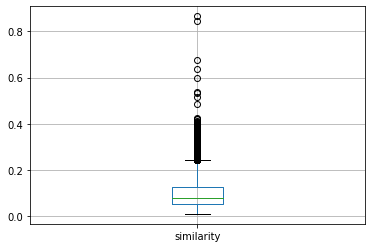

In [58]:
recs_df.boxplot(column=['similarity'])
plt.show()

### Explore the book data

In [60]:
# Book tags for Lord of the Rings
lord_of_the_rings_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='The Fellowship of the Ring (The Lord of the Rings, #1)']['tag_name'])
lord_of_the_rings_tags

tag_name
1800  to-read                       
1801  fantasy                       
1802  favorites                     
1803  currently-reading             
1804  young-adult                   
1805  fiction                       
1806  books-i-own                   
1807  owned                         
1808  ya                            
1809  series                        
1810  favourites                    
1811  magic                         
1812  owned-books                   
1813  re-read                       
1814  adventure                     
1815  sci-fi-fantasy                
1816  childhood                     
1817  all-time-favorites            
1818  default                       
1819  my-books                      
1820  classics                      
1821  reread                        
1822  i-own                         
1823  audiobook                     
1824  5-stars                       
1825  favorite-books                
1826  novels                        
1827  favorite                      
1828  audiobooks                    
1829  read-more-than-once           
1830  my-library                    
1831  english                       
1832  british                       
1833  books                         
1834  read-in-2016                  
1835  re-reads                      
1836  my-favorites                  
1837  own-it                        
1838  library                       
1839  audio                         
1840  novel                         
1841  read-in-2015                  
1842  shelfari-favorites            
1843  kindle                        
1844  favourite                     
1845  to-buy                        
1846  read-in-2014                  
1847  to-re-read                    
1848  ebook                         
1849  science-fiction-fantasy       
1850  on-my-shelf                   
1851  my-bookshelf                  
1852  bookshelf                     
1853  fantasy-scifi                 
1854  classic                       
1855  have                          
1856  movie                         
1857  british-literature            
1858  fantasy-fiction               
1859  sci-fi                        
1860  fiction-fantasy               
1861  fantasia                      
1862  séries                        
1863  rory-gilmore-reading-challenge
1864  epic-fantasy                  
1865  science-fiction               
1866  high-fantasy                  
1867  fantasy-and-sci-fi            
1868  home-library                  
1869  adult                         
1870  1001-books                    
1871  adult-fiction                 
1872  1001                          
1873  literature                    
1874  sci-fi-and-fantasy            
1875  speculative-fiction           
1876  20th-century                  
1877  abandoned                     
1878  audible                       
1879  ebooks                        
1880  sf-fantasy                    
1881  modern-classics               
1882  unfinished                    
1883  dnf                           
1884  on-hold                       
1885  paperback                     
1886  tbr                           
1887  j-r-r-tolkien                 
1888  lord-of-the-rings             
1889  epic                          
1890  classic-literature            
1891  middle-earth                  
1892  war                           
1893  lotr                          
1894  movies                        
1895  fantasy-science-fiction       
1896  elves                         
1897  tolkien                       
1898  fantasía                      
1899  the-lord-of-the-rings

In [59]:
# Book tags for Zero to One
zero_to_one_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='Zero to One: Notes on Startups, or How to Build the Future']['tag_name'])
zero_to_one_tags

tag_name
216462  to-read                  
216463  favorites                
216464  currently-reading        
216465  books-i-own              
216466  owned                    
216467  favourites               
216468  re-read                  
216469  default                  
216470  my-books                 
216471  audiobook                
216472  favorite                 
216473  audiobooks               
216474  my-library               
216475  english                  
216476  books                    
216477  library                  
216478  read-in-2015             
216479  kindle                   
216480  to-buy                   
216481  to-re-read               
216482  ebook                    
216483  read-in-2017             
216484  audio-books              
216485  read-again               
216486  read-2016                
216487  read-2015                
216488  wish-list                
216489  science                  
216490  abandoned                
216491  audible                  
216492  must-read                
216493  philosophy               
216494  nonfiction               
216495  non-fiction              
216496  to-read-non-fiction      
216497  to-read-nonfiction       
216498  non-fiction-to-read      
216499  education                
216500  maybe                    
216501  learning                 
216502  self-help                
216503  bought                   
216504  future                   
216505  inspirational            
216506  next                     
216507  priority                 
216508  economics                
216509  business                 
216510  psychology               
216511  finance                  
216512  money                    
216513  investing                
216514  personal-development     
216515  self-improvement         
216516  business-finance         
216517  investment               
216518  success                  
216519  business-books           
216520  to-read-business         
216521  self-development         
216522  entrepreneurship         
216523  entrepreneur             
216524  business-books-to-read   
216525  professional             
216526  marketing                
216527  economy                  
216528  business-economics       
216529  technology               
216530  tech                     
216531  product-management       
216532  work                     
216533  product                  
216534  career                   
216535  pm                       
216536  strategy                 
216537  leadership               
216538  business-investing       
216539  productivity             
216540  management               
216541  biz                      
216542  business-to-read         
216543  2017-reading-list        
216544  bussiness                
216545  mba                      
216546  business-management      
216547  blinkist                 
216548  innovation               
216549  startup                  
216550  startups                 
216551  business-strategy        
216552  start-up                 
216553  business-entrepreneurship
216554  before-30                
216555  listened                 
216556  next-up                  
216557  elon-musk                
216558  entrepreneurial          
216559  start-ups                
216560  enterpreneurship         
216561  skimm-reads

In [68]:
# Book tag for other startup book
startup_tags = pd.DataFrame(books_with_tags[books_with_tags['title']=='Founders at Work: Stories of Startups\' Early Days']['tag_name'])
startup_tags

tag_name
646162  to-read                    
646163  favorites                  
646164  currently-reading          
646165  books-i-own                
646166  owned                      
646167  owned-books                
646168  default                    
646169  my-books                   
646170  i-own                      
646171  favorite                   
646172  my-library                 
646173  library                    
646174  shelfari-favorites         
646175  kindle                     
646176  to-buy                     
646177  ebook                      
646178  wish-list                  
646179  abandoned                  
646180  ebooks                     
646181  must-read                  
646182  unfinished                 
646183  on-hold                    
646184  history                    
646185  nonfiction                 
646186  non-fiction                
646187  to-read-non-fiction        
646188  to-read-nonfiction         
646189  non-fiction-to-read        
646190  memoir                     
646191  biography                  
646192  biographies                
646193  to-get                     
646194  1                          
646195  self-help                  
646196  half-read                  
646197  bought                     
646198  inspirational              
646199  stopped-reading            
646200  physical                   
646201  read-next                  
646202  economics                  
646203  business                   
646204  money                      
646205  investing                  
646206  self-improvement           
646207  business-finance           
646208  business-books             
646209  to-read-business           
646210  entrepreneurship           
646211  entrepreneur               
646212  professional               
646213  marketing                  
646214  business-economics         
646215  technology                 
646216  tech                       
646217  computer                   
646218  computers                  
646219  product-management         
646220  personal-mba               
646221  work                       
646222  programming                
646223  career                     
646224  software                   
646225  software-development       
646226  work-related               
646227  strategy                   
646228  2016-reading-list          
646229  leadership                 
646230  management                 
646231  biz                        
646232  business-to-read           
646233  to-purchase                
646234  business-management        
646235  innovation                 
646236  startup                    
646237  startups                   
646238  start-up                   
646239  business-entrepreneurship  
646240  silicon                    
646241  web                        
646242  it                         
646243  internet                   
646244  dev                        
646245  someday                    
646246  later                      
646247  queue                      
646248  to-read-next               
646249  read-business              
646250  audio-cd-s-cassettes       
646251  2017-to-read               
646252  interviews                 
646253  to-read-2016               
646254  to-read-biz                
646255  startup-books              
646256  business-startup           
646257  enterpreneurship           
646258  empreendedorismo           
646259  transform-life-and-business
646260  recommended-by-others      
646261  at-work

In [67]:
# Check commonalities and differences within each
# False = different
# True = common
lord_of_the_rings_tags['tag_name'].isin(zero_to_one_tags['tag_name']).value_counts(normalize=True)

False    0.77
True     0.23
Name: tag_name, dtype: float64

In [71]:
# Check commonalities and differences within each
# False = different
# True = common
lord_of_the_rings_tags['tag_name'].isin(startup_tags['tag_name']).value_counts(normalize=True)

False    0.8
True     0.2
Name: tag_name, dtype: float64